# Data Cleaning - Parsing Dates


Objetivo: Realizar a limpeza de dados das colunas 'Date' da planilha earthquakes (Terremotos), aprendendo sobre a biblioteca datetime. Criar novas colunas e  plotar o gráfico.

Fonte: 
https://www.kaggle.com/learn/data-cleaning


## Passo 1 - Importar bibliotecas e ler o arquivo

In [1]:
# importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import datetime


In [2]:
# lendo o arquivo

earthquakes = pd.read_csv('database.csv')
earthquakes

np.random.seed(0)

## Passo 2 - Verificar o tipo de dados da coluna de "Date"

Nesse caso, o que será trabalhado é a coluna "Date" do dataframe de earthquakes. 
- Investigar a coluna: ela contém datas? Qual é o dtype da coluna?

In [3]:
# usar o info() para verificar o dtype da coluna 'Date'

earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Verifica-se que na coluna 'Date', o dtype está como object. Transformar as linhas com formatação errada para datetime em outra coluna chamada'data_parsed'. 

## Passo 3 - Corrigir as linhas com formatação diferenciada da coluna 'Date'

A maioria das entradas na coluna "Date" segue o mesmo formato: "mês/dia/ano com quatro dígitos". No entanto, a entrada no índice 3378 segue um padrão completamente diferente. Execute a célula de código abaixo para ver isso.

In [4]:
# executando

earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


Isso parece ser um problema com a entrada de dados: idealmente, todas as entradas na coluna têm o mesmo formato. 

Podemos ter uma ideia de quão difundido é esse problema verificando o tamanho de cada entrada na coluna "Date".

In [5]:
# no index 3378 da coluna Date, o valor está completamente diferente dos outros, a data está misturada.
# verificando o tamanho de cada entrada da coluna 'Date'

# contando valores e quais estão em formato diferente - .value_counts()
# str - string 
# len (obter o número de itens em um determinado objeto, string, array, listas, etc

# variavel.str.len() determina o comprimento de cada string em uma série do Pandas. Também pode contar valores vazios.


date_lenghts = earthquakes.Date.str.len()
date_lenghts.value_counts()

10    23409
24        3
Name: Date, dtype: int64

Há 3 linhas que estão com formatação diferente - índice 24

In [6]:
# Rodar um código para obter os índices correspondentes a essas linhas

# 24 - referente as 3 linhas
#[1] - coluna 1 - 'DATE'
# indices - numero das linhas

indices = np.where([date_lenghts == 24])[1]
print('Indices with wrong data:', indices)
earthquakes.loc[indices]

Indices with wrong data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


Dadas todas essas informações, criar uma nova coluna "date_parsed" no conjunto de dados de terremotos que tenha datas analisadas corretamente.

Observação: ao concluir este problema, pode-se (mas não é obrigado a) corrigir as entradas nas colunas "Date" e "Time". Não remova nenhuma linha do datase

In [7]:
# localizado as linhas com as datas diferentes. São 3 linhas
# loc[linha,'coluna']
# inserindo apenas data - seguindo formatação das datas do restante da planilha, igualar - mês/dia/ano (4 dígitos)

earthquakes.loc[3378, 'Date'] = "02/23/1975"
earthquakes.loc[7512, 'Date'] = "04/28/1985"
earthquakes.loc[20650,'Date'] = "03/13/2011"

# passando para o formato %m / %d / %Y , convertendo para datetime
# date_parsed - nova coluna 

earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format= '%m/%d/%Y')


In [8]:
# convertendo a coluna time

earthquakes.loc[3378, 'Time'] = "02:58:41"
earthquakes.loc[7512, 'Time'] = "02:53:41"
earthquakes.loc[20650,'Time'] = "02:23:34"


earthquakes['time_parsed'] = pd.to_datetime(earthquakes['Time'], format= '%H:%M:%S')

## Passo 4 - Verificar as mudanças feitas anteriormente

In [9]:
indices = np.where([date_lenghts == 24])[1]
print('Indices with date and time changed:', indices)
earthquakes.loc[indices]

# as datas e horários foram alterados com sucesso.

Indices with date and time changed: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed,time_parsed
3378,02/23/1975,02:58:41,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,1975-02-23,1900-01-01 02:58:41
7512,04/28/1985,02:53:41,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed,1985-04-28,1900-01-01 02:53:41
20650,03/13/2011,02:23:34,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed,2011-03-13,1900-01-01 02:23:34


### Selecionando o dia do mês

Crie um day_of_month_earthquakes da série Pandas contendo o dia do mês da coluna "date_parsed"

In [10]:
# obtendo apenas o dia do mês - coluna date_parsed - dt.day

day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
day_of_month_earthquakes

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: date_parsed, Length: 23412, dtype: int64

## Passo 5 - Plotar o gráfico

Plote os dias do mês a partir do conjunto de dados do terremoto

In [11]:
# removendo valores vazios 

day_of_month_earthquakes = day_of_month_earthquakes.dropna()

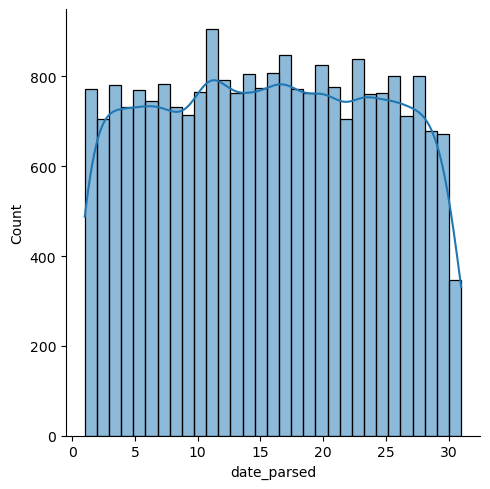

In [12]:
# plotando o gráfico apenas com os dias do mês da coluna date_parsed

sns.displot(day_of_month_earthquakes, kde=True, bins=31)